Local copy of the dataset file: /Users/ian/.keras/datasets/iris_training.csv
Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species
OrderedDict([('sepal_length', <tf.Tensor: id=341, shape=(32,), dtype=float32, numpy=
array([5.5, 6.1, 4.4, 6.4, 5.7, 6.5, 7.7, 6.4, 6. , 6.2, 4.9, 6.4, 5.4,
       5. , 6. , 6.5, 7.2, 5. , 4.7, 4.6, 5.7, 5.1, 5.3, 5.8, 7.2, 5.8,
       4.4, 6.8, 5.2, 6.2, 4.7, 7.7], dtype=float32)>), ('sepal_width', <tf.Tensor: id=342, shape=(32,), dtype=float32, numpy=
array([3.5, 2.8, 2.9, 2.8, 4.4, 2.8, 2.8, 3.2, 2.7, 2.8, 2.5, 2.8, 3.9,
       3.4, 2.9, 3. , 3.6, 3.6, 3.2, 3.6, 3. , 2.5, 3.7, 2.7, 3. , 2.8,
       3. , 2.8, 3.5, 3.4, 3.2, 3.8], dtype=float32)>), ('petal_length', <tf.Tensor: id=339, shape=(32,), dtype=float32, numpy=
array([1.3, 4. , 1.4, 5.6, 1.5, 4.6, 6.7, 4.5, 5.1, 4.8, 4.5, 5.6, 1.3,
       1.5, 4.5, 5.5, 6.1, 1.4, 1.3, 1. , 4.2, 3. , 1.5, 5.1, 5.8, 5.1,
       1.3, 4.8, 1.5, 5.4, 1.6, 6.7], dtype=float32)>), ('petal

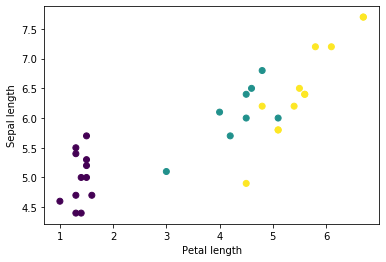

In [2]:

import os
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)
features, labels = next(iter(train_dataset))

print(features)
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()


In [25]:
inputTensor = keras.layers.Input(input_shape)
x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputTensor)


TypeError: 'odict_values' object is not subscriptable

In [15]:

n_models = 2
models = []
for _ in range(n_models):
    models.append(keras.Sequential([
        keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
        keras.layers.Dense(10, activation=tf.nn.relu),
        keras.layers.Dense(3)
  ]))
    
# predictions = models(features)
# predictions[:5]

ValueError: Layer sequential_5 was called with an input that isn't a symbolic tensor. Received type: <class 'collections.OrderedDict'>. Full input: [OrderedDict([('sepal_length', <tf.Tensor: id=341, shape=(32,), dtype=float32, numpy=
array([5.5, 6.1, 4.4, 6.4, 5.7, 6.5, 7.7, 6.4, 6. , 6.2, 4.9, 6.4, 5.4,
       5. , 6. , 6.5, 7.2, 5. , 4.7, 4.6, 5.7, 5.1, 5.3, 5.8, 7.2, 5.8,
       4.4, 6.8, 5.2, 6.2, 4.7, 7.7], dtype=float32)>), ('sepal_width', <tf.Tensor: id=342, shape=(32,), dtype=float32, numpy=
array([3.5, 2.8, 2.9, 2.8, 4.4, 2.8, 2.8, 3.2, 2.7, 2.8, 2.5, 2.8, 3.9,
       3.4, 2.9, 3. , 3.6, 3.6, 3.2, 3.6, 3. , 2.5, 3.7, 2.7, 3. , 2.8,
       3. , 2.8, 3.5, 3.4, 3.2, 3.8], dtype=float32)>), ('petal_length', <tf.Tensor: id=339, shape=(32,), dtype=float32, numpy=
array([1.3, 4. , 1.4, 5.6, 1.5, 4.6, 6.7, 4.5, 5.1, 4.8, 4.5, 5.6, 1.3,
       1.5, 4.5, 5.5, 6.1, 1.4, 1.3, 1. , 4.2, 3. , 1.5, 5.1, 5.8, 5.1,
       1.3, 4.8, 1.5, 5.4, 1.6, 6.7], dtype=float32)>), ('petal_width', <tf.Tensor: id=340, shape=(32,), dtype=float32, numpy=
array([0.2, 1.3, 0.2, 2.2, 0.4, 1.5, 2. , 1.5, 1.6, 1.8, 1.7, 2.1, 0.4,
       0.2, 1.5, 1.8, 2.5, 0.2, 0.2, 0.2, 1.2, 1.1, 0.2, 1.9, 1.6, 2.4,
       0.2, 1.4, 0.2, 2.3, 0.2, 2.2], dtype=float32)>)])]. All inputs to the layer should be tensors.

In [32]:


loss_object = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def loss(model, x, y):
    y_ = model(x)

    return loss_object(y_true=y, y_pred=y_)

# l = loss(models[0], features, labels)
# print("Loss test: {}".format(l))



def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)


optimizer = keras.optimizers.SGD(learning_rate=0.01)
loss_value, grads = grad(models[0], features, labels)


'''

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, models[0].trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(models[0], features, labels).numpy()))
'''
## Note: Rerunning this cell uses the same model variables


ValueError: Layer sequential_6 was called with an input that isn't a symbolic tensor. Received type: <class 'collections.OrderedDict'>. Full input: [OrderedDict([('sepal_length', <tf.Tensor: id=341, shape=(32,), dtype=float32, numpy=
array([5.5, 6.1, 4.4, 6.4, 5.7, 6.5, 7.7, 6.4, 6. , 6.2, 4.9, 6.4, 5.4,
       5. , 6. , 6.5, 7.2, 5. , 4.7, 4.6, 5.7, 5.1, 5.3, 5.8, 7.2, 5.8,
       4.4, 6.8, 5.2, 6.2, 4.7, 7.7], dtype=float32)>), ('sepal_width', <tf.Tensor: id=342, shape=(32,), dtype=float32, numpy=
array([3.5, 2.8, 2.9, 2.8, 4.4, 2.8, 2.8, 3.2, 2.7, 2.8, 2.5, 2.8, 3.9,
       3.4, 2.9, 3. , 3.6, 3.6, 3.2, 3.6, 3. , 2.5, 3.7, 2.7, 3. , 2.8,
       3. , 2.8, 3.5, 3.4, 3.2, 3.8], dtype=float32)>), ('petal_length', <tf.Tensor: id=339, shape=(32,), dtype=float32, numpy=
array([1.3, 4. , 1.4, 5.6, 1.5, 4.6, 6.7, 4.5, 5.1, 4.8, 4.5, 5.6, 1.3,
       1.5, 4.5, 5.5, 6.1, 1.4, 1.3, 1. , 4.2, 3. , 1.5, 5.1, 5.8, 5.1,
       1.3, 4.8, 1.5, 5.4, 1.6, 6.7], dtype=float32)>), ('petal_width', <tf.Tensor: id=340, shape=(32,), dtype=float32, numpy=
array([0.2, 1.3, 0.2, 2.2, 0.4, 1.5, 2. , 1.5, 1.6, 1.8, 1.7, 2.1, 0.4,
       0.2, 1.5, 1.8, 2.5, 0.2, 0.2, 0.2, 1.2, 1.1, 0.2, 1.9, 1.6, 2.4,
       0.2, 1.4, 0.2, 2.3, 0.2, 2.2], dtype=float32)>)])]. All inputs to the layer should be tensors.

In [26]:
model = keras.Sequential([
    keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(3)
])


In [27]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [30]:
# model.compile(
#  optimizer = "adam",
#  loss = "binary_crossentropy",
#  metrics = ["accuracy"]
# )
# model.fit(train_images, train_labels, epochs=10)

# # l = loss(model, features, labels)


NameError: name 'train_images' is not defined

In [31]:

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = keras.metrics.Mean()
    epoch_accuracy = keras.metrics.SparseCategoricalAccuracy()

    # Training loop - using batches of 32
    for x, y in train_dataset:
        # Optimize the model
        loss_value = tf.Variable((x.shape))
        #     for model in models:
        loss_value_part, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # Track progress
        epoch_loss_avg(loss_value)  # Add current batch loss
        # Compare predicted label to actual label
        epoch_accuracy(y, model(x))

    # End epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()


AttributeError: 'collections.OrderedDict' object has no attribute 'shape'

In [ ]:

test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels


test_dataset = test_dataset.map(pack_features_vector)

test_accuracy = keras.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

tf.stack([y,prediction],axis=1)
